In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "EXVO"
# coin = "PROTON"

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

df = pd.read_csv(fname)

In [3]:
df.head(10)

,difficulty,height,nonce,time
0,429.946952,45670.0,6.243489e+08,1.525524e+09
1,478.057788,45669.0,2.768404e+09,1.525523e+09
2,696.040140,45668.0,1.786501e+09,1.525523e+09
3,801.359704,45667.0,3.158216e+09,1.525523e+09
4,783.758932,45666.0,1.770534e+09,1.525522e+09
5,767.691266,45665.0,2.607776e+09,1.525522e+09
6,744.929423,45664.0,1.605446e+09,1.525522e+09
7,748.935904,45663.0,2.526697e+09,1.525522e+09
8,711.663809,45662.0,9.159842e+08,1.525522e+09
9,702.094523,45661.0,1.953878e+09,1.525522e+09


In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
df.head(5)

,difficulty,height,nonce,time,date
0,429.946952,45670.0,6.243489e+08,1.525524e+09,2018-05-05 12:34:47
1,478.057788,45669.0,2.768404e+09,1.525523e+09,2018-05-05 12:28:07
2,696.040140,45668.0,1.786501e+09,1.525523e+09,2018-05-05 12:24:15
3,801.359704,45667.0,3.158216e+09,1.525523e+09,2018-05-05 12:20:24
4,783.758932,45666.0,1.770534e+09,1.525522e+09,2018-05-05 12:13:23


In [6]:
df_block_rate = df[['height','time']]

In [7]:
df_block_rate.head(3)

,height,time
0,45670.0,1.525524e+09
1,45669.0,1.525523e+09
2,45668.0,1.525523e+09


In [8]:
MA_window = min(400, df_block_rate.count()[0]-1)

In [9]:
df_block_rate.count()[0]

1067

In [10]:
df_block_rate

,height,time
0,45670.0,1.525524e+09
1,45669.0,1.525523e+09
2,45668.0,1.525523e+09
3,45667.0,1.525523e+09
4,45666.0,1.525522e+09
5,45665.0,1.525522e+09
6,45664.0,1.525522e+09
7,45663.0,1.525522e+09
8,45662.0,1.525522e+09
9,45661.0,1.525522e+09


In [11]:
df_block_rate = df_block_rate.diff(-MA_window).dropna()

df_block_rate = df_block_rate.diff(-10).dropna()

In [12]:
df_block_rate.head(3)

,height,time
0,400.0,29069.0
1,400.0,28796.0
2,400.0,28584.0


In [13]:
df_block_rate['block_per_day']=df_block_rate['height']/df_block_rate['time']*3600*24

In [14]:
df_block_rate

,height,time,block_per_day
0,400.0,29069.0,1188.895387
1,400.0,28796.0,1200.166690
2,400.0,28584.0,1209.068010
3,400.0,28437.0,1215.318072
4,400.0,28103.0,1229.761947
5,400.0,27841.0,1241.334722
6,400.0,27922.0,1237.733687
7,400.0,27978.0,1235.256273
8,400.0,28010.0,1233.845055
9,400.0,27997.0,1234.417973


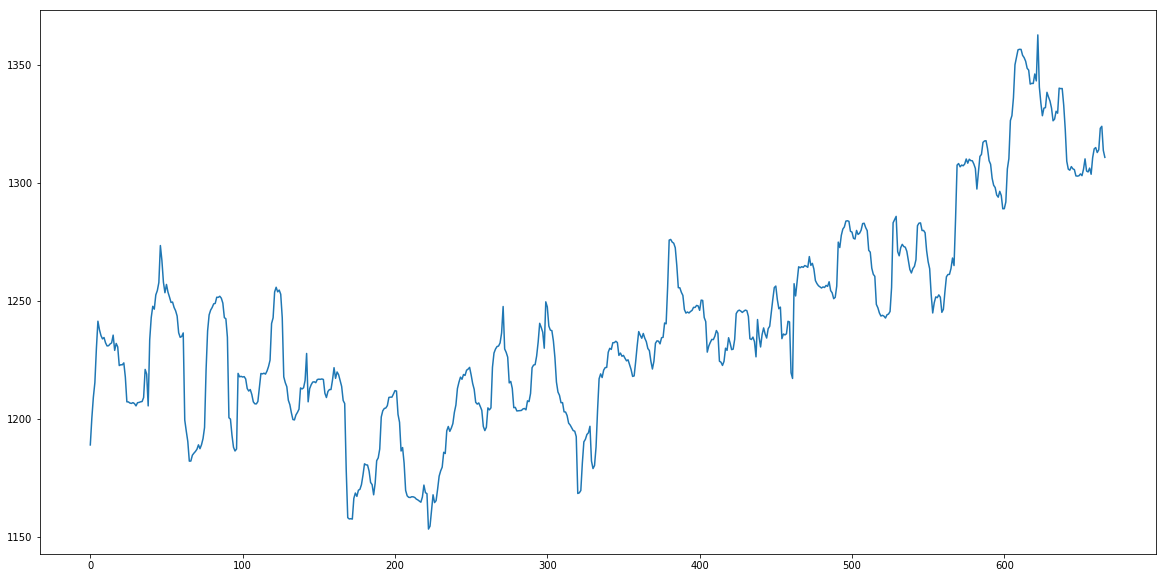

In [15]:
fig = plt.figure(figsize=(20,10))
x_axis = df_block_rate['height']
y_axis = df_block_rate['block_per_day']
plt.plot(y_axis)
# plt.plot(x_axis, y_axis)
# fig.suptitle('Block_Speed vs Block Height', fontsize=20)
# plt.xlabel('Block Height', fontsize=18)
# plt.ylabel('Block Speed', fontsize=18)

In [16]:
block_speed_latest = int(df_block_rate['block_per_day'][0])

In [17]:
print("Coin [{}] Block Speed is {} Blocks/Day".format(coin, block_speed_latest))

Coin [EXVO] Block Speed is 1188 Blocks/Day
